In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
%matplotlib inline

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#Extract MNIST data
train_x = mnist.train.images
train_y = mnist.train.labels

X = tf.placeholder(shape=[None,784],dtype=tf.float32,name="X")
Y = tf.placeholder(shape=[None,10],dtype=tf.float32,name="Y")

costs = []

In [3]:
#hyperparameters

training_epoches = 25
batch_size = 1000
total_batches = int(mnist.train.num_examples/batch_size)

W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

In [4]:
#Softmax Activation
y_ = tf.nn.softmax(tf.matmul(X,W)+b)

#Cost function
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(y_ + 1e-10), reduction_indices=1))

#Adam Optimizer to minimize the cost
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

#Initializing the variables
init = tf.global_variables_initializer()

cost after epoch 1 : 1.893264
cost after epoch 2 : 0.954545
cost after epoch 3 : 0.833603
cost after epoch 4 : 0.684687
cost after epoch 5 : 0.647456
cost after epoch 6 : 0.614691
cost after epoch 7 : 0.589777
cost after epoch 8 : 0.529010
cost after epoch 9 : 0.397251
cost after epoch 10 : 0.451035
cost after epoch 11 : 0.417441
cost after epoch 12 : 0.358263
cost after epoch 13 : 0.339933
cost after epoch 14 : 0.359245
cost after epoch 15 : 0.354331
cost after epoch 16 : 0.246961
cost after epoch 17 : 0.332155
cost after epoch 18 : 0.263954
cost after epoch 19 : 0.397901
cost after epoch 20 : 0.233316
cost after epoch 21 : 0.301864
cost after epoch 22 : 0.341211
cost after epoch 23 : 0.261257
cost after epoch 24 : 0.298222
cost after epoch 25 : 0.361757
Accuracy: 0.9147


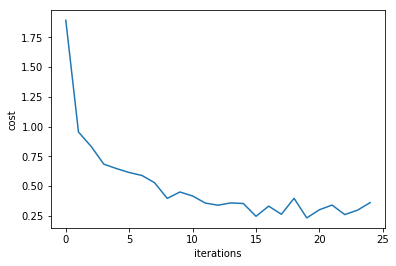

In [5]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Training session
    for epoches in range(training_epoches):
        #Loop over all batches
        for i in range(total_batches):
            xs_batch,ys_batch = mnist.train.next_batch(batch_size)
            sess.run(optimizer,feed_dict={X:xs_batch,Y:ys_batch})
        print("cost after epoch %i : %f"%(epoches+1,sess.run(cost,feed_dict={X:xs_batch,Y:ys_batch}))) 
        costs.append(sess.run(cost,feed_dict={X:xs_batch,Y:ys_batch}))
    
    #accuracy calculation
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
    #plotting cost
    plt.plot(costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")